In [1]:
# import statements
import utils as ut
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
reload(ut)
plt.style.use('acme')

/usr/local/anaconda2/lib/python2.7/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "

Bad key "axes.titlepad" on line 24 in
/home/derekgm@byu.local/.config/matplotlib/stylelib/acme.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
#c,df,T = ut.make_train_test()
fname = ut.get_file()
T = pd.read_csv(fname)
T.index = pd.to_datetime(T['ts'],unit='ms') - pd.DateOffset(hours=7)
T.tail()
df = pd.read_csv("/home/derekgm@byu.local/myacmeshare/trumpdf.csv")


	Options

            1: trump from lab computer

            2: trump from linux mint

            3: clean trump from lab computer

            4: clean trump from linux mint


Enter number >> 3


In [3]:
df.index = pd.to_datetime(df['ts'],unit='ms') - pd.DateOffset(hours=7)

## Comparison of Data with Neutral tweets and non-neutral tweets

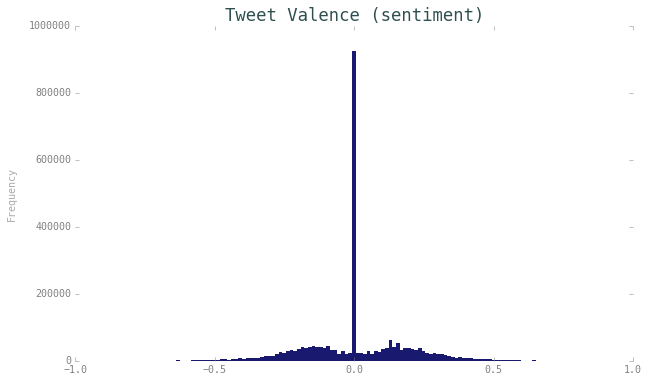

In [17]:
(df['pos']-df['neg']).plot(kind='hist',bins=150,linewidth=0)
plt.title("Tweet Valence (sentiment)")
plt.show()

Our goal is to classify tweets as having pro-Trump or anti-Trump sentiment on election night. Naturally, it is important to visualize a distribution of the valence, or sentiment, of the tweet data. Valence scores for positive, negative, and neutral sentiment were calculated. The compound Valence is a special combination of these three scores. It takes a normalized combination of the positive, negative, and neutral scores.

In the above plot, you can see the sentiment for the entire data set. There is an exorbitant amount of neutral tweets in the data. For this reason we will look at the trends in our data without them. The dataframe labeled "df" refers to the full, unmodified data set. The dataframe labeled "T" is a modified data set where retweets and neutral tweets are removed. Tweets in the T dataframe only have scores that are not entirely neutral and that contain either positive sentiment or negative sentiment, but not both. For example, a tweet with positive score .5 and negative score .3 would not show up in the T dataframe. Similarly, a tweet with no positive or negative score and neutral score of 1. would not show up in the T dataframe.

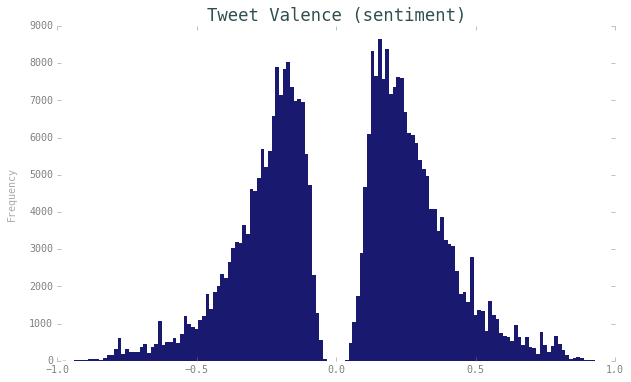

In [16]:
T['pos-neg'].plot(kind='hist',bins=150,linewidth=0)
plt.title("Tweet Valence (sentiment)")
plt.show()

When we remove the neutral tweets we more easily see a trend in the data. The valence distribution is bimodal with modes on either side of the spectrum. Note that the mode for each distribution is around .25 or -.25 respectively. We expected tweets to be very polarized in sentiment. This distribution suggests that fewer people tweet with extreme sentiment, contrary to what we thought.

The following two plots show the distribution of neutral valence scores for the entire data set and the modified data set, respectively. 

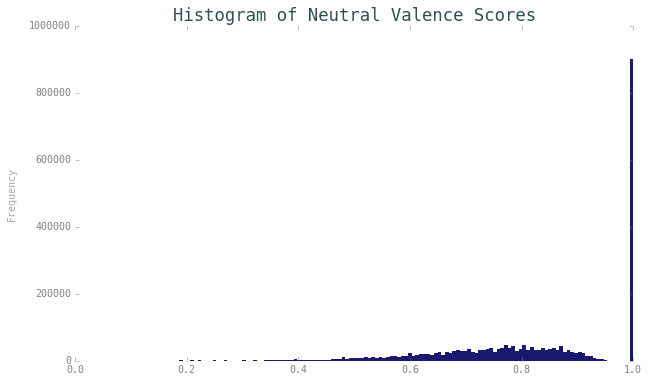

In [19]:
df['neu'].plot(kind='hist',bins=150,linewidth=0)
plt.title("Histogram of Neutral Valence Scores")
plt.show()

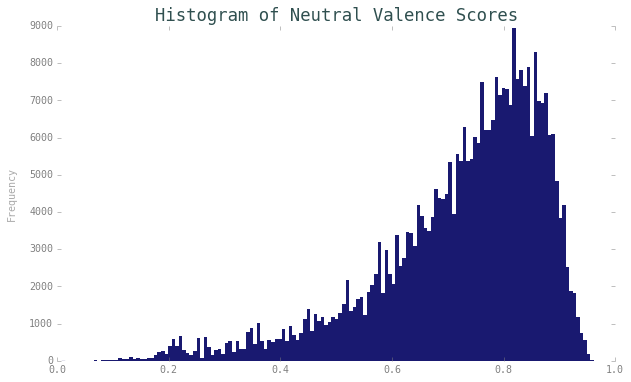

In [18]:
T['neu'].plot(kind='hist',bins=150,linewidth=0)
plt.title("Histogram of Neutral Valence Scores")
plt.show()

The following two plots show the compound score distribution. The neutral scores are highly represented and once removed, we can see similar trends to the sentiment of the tweet, which makes sense because it is a combination of the negative, positive, and neutral parts.

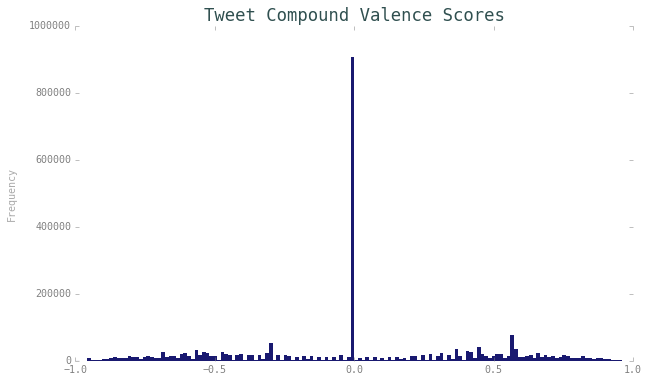

In [21]:
df['comp'].plot(kind='hist',bins=150,linewidth=0)
plt.title("Tweet Compound Valence Scores")
plt.show()

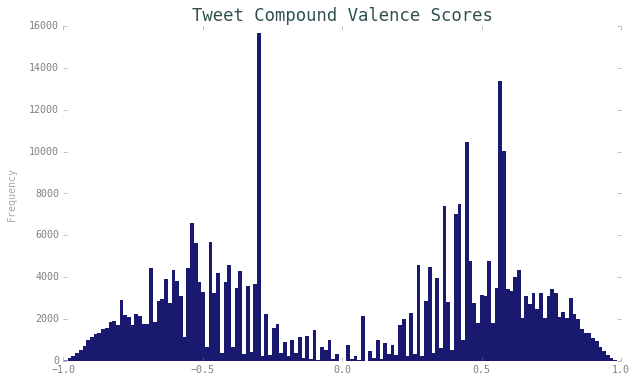

In [20]:
T['comp'].plot(kind='hist',bins=150,linewidth=0)
plt.title("Tweet Compound Valence Scores")
plt.show()

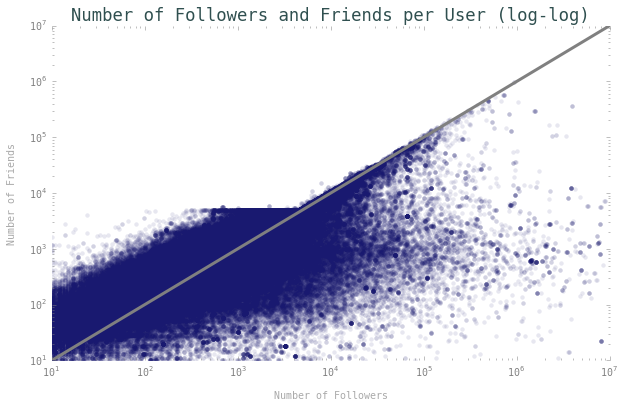

In [22]:
T.plot(kind='scatter',x='usr_fol',y='usr_fri',color="#191970",alpha=.1,linewidth=0)
x2 = np.linspace(-5,10000000,len(df))
plt.plot(x2,x2,color='grey')
plt.xscale('log')
plt.yscale('log')
plt.xlim(10**1,10**7)
plt.ylim(10**1,10**7)
plt.title("Number of Followers and Friends per User (log-log)")
plt.xlabel("Number of Followers")
plt.ylabel("Number of Friends")
plt.show()

Here we see a plot that shows the number of follower and friends per user on Twitter. This shows something interesting and could lead us to think about other useful properties of the data.

Next, we look at valence scores over time. In order to observe trends in sentiment, we chose to look at the average of the sentiments over minute intervals. The following plots show these sentiment averages on the different days that the data was acquired. We are investigating the tweets at particular times in order to see why there is strange behaviour. For example, the average valence per minute on Oct. 26th starts out high and has a big drop.

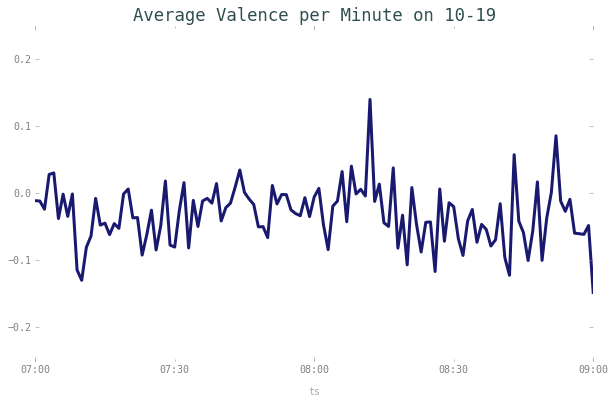

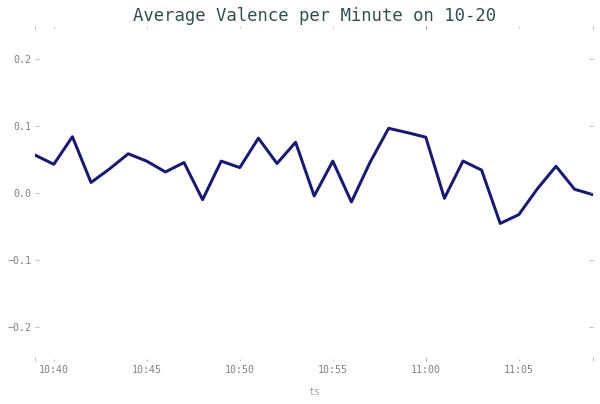

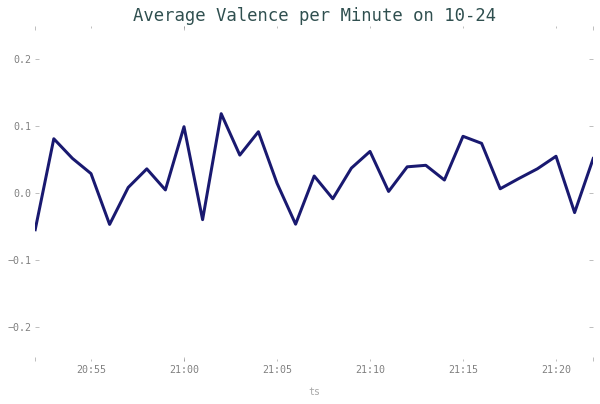

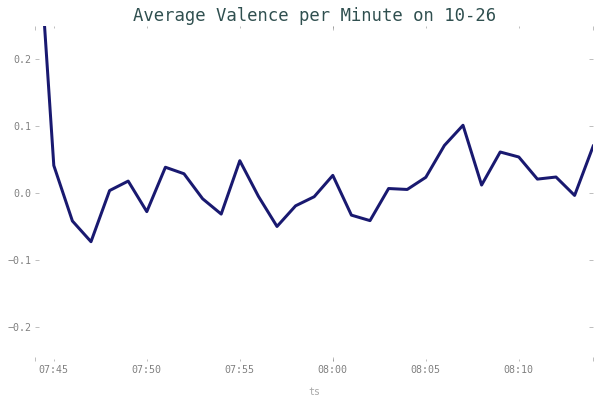

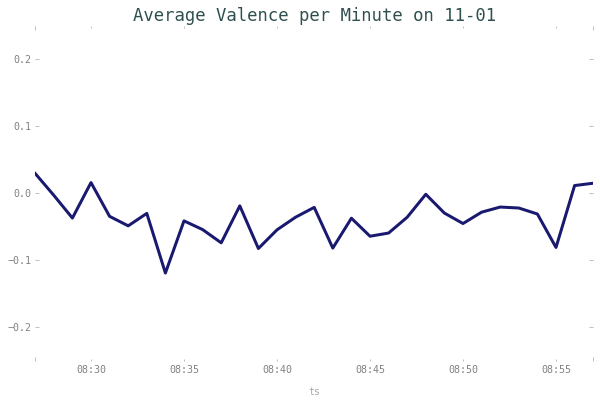

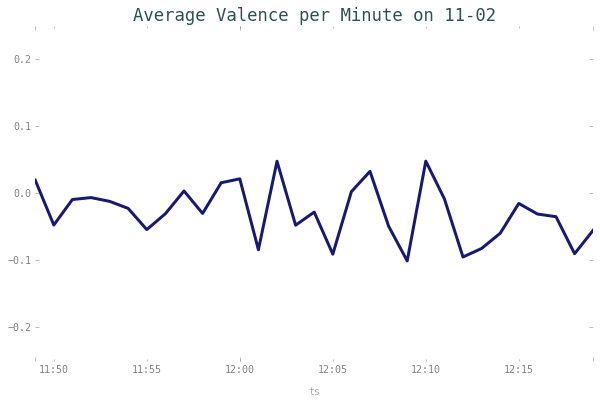

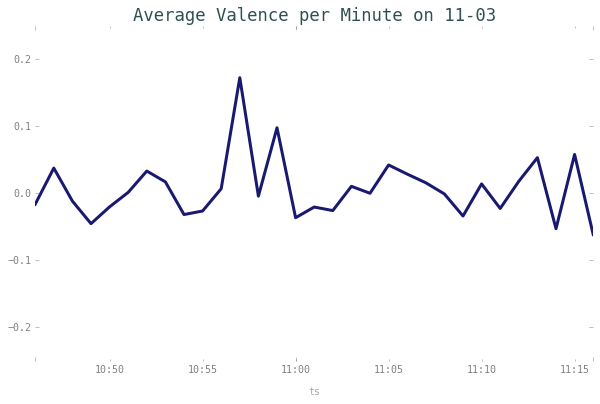

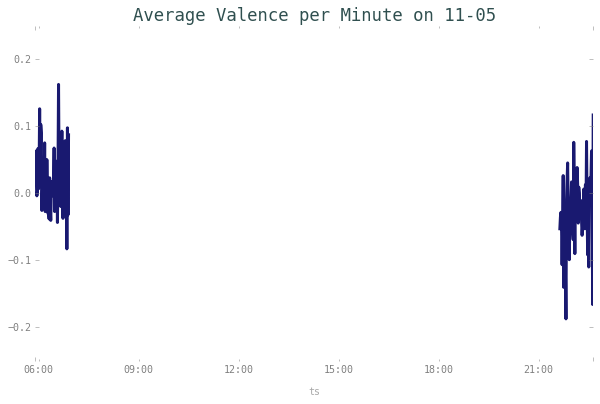

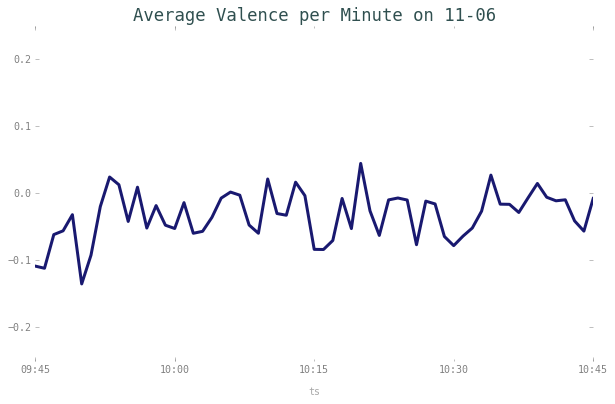

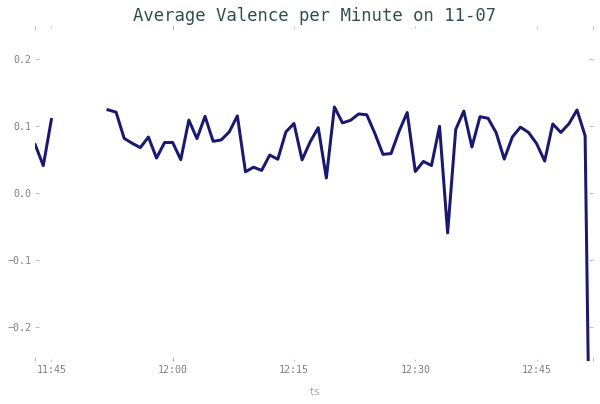

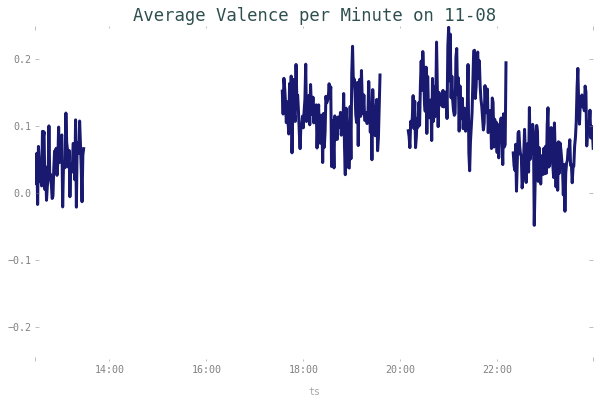

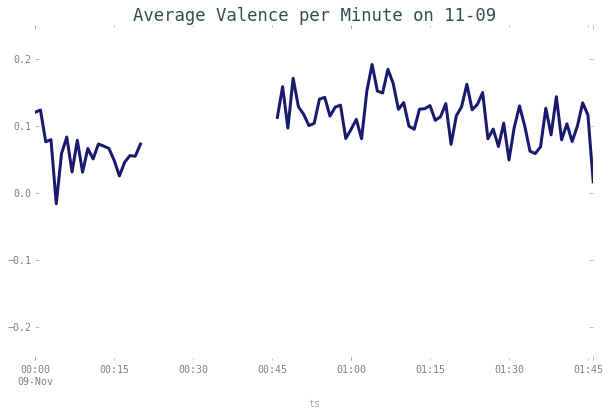

In [23]:
dates = ["10-19","10-20","10-24","10-26","11-01","11-02","11-03","11-05","11-06","11-07","11-08","11-09"]
for d in dates:
    d_ = "2016-" + d
    T['comp'][d_].resample("1Min").mean().plot(kind='line')
    plt.title("Average Valence per Minute on "+d)
    plt.ylim(-.25,.25)
    plt.show()

Finally, we take a look at how average behaviour changes via the number of hashtags, mentions, weblinks, and retweets. All but the retweets seem to drop as we approach election day which is definitely worth noting. We would like to see that the expression of the current sentiment in a tweet took more precedence over mentions, hasthags, and weblinks in the approach to the election.

The weblinks, mentions, and hashtags come from the modified data set. The retweets come from the original data set.

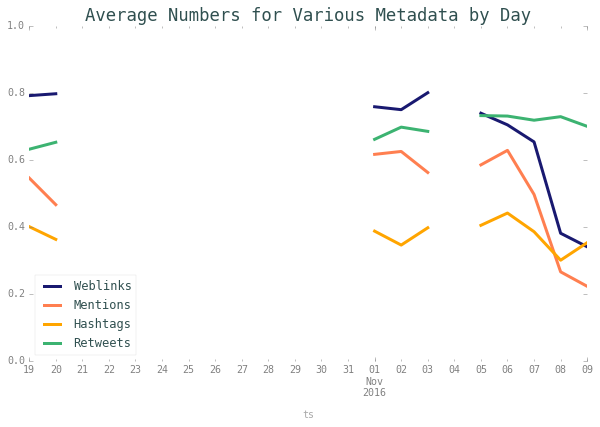

In [34]:
ax = T['n_weblinks'].resample("D").mean().plot(kind='line',label="Weblinks")
T['n_mentions'].resample("D").mean().plot(kind='line',label="Mentions",ax=ax)
T['n_hashtags'].resample("D").mean().plot(kind='line',ax=ax,label="Hashtags")
df['RT'].resample("D").mean().plot(kind='line',ax=ax,label="Retweets")
plt.ylim(0,1)
plt.legend(loc='lower left')
plt.title("Average Numbers for Various Metadata by Day")
plt.show()

These last plots show a comparison between the original and modified data sets. The trends are the same, usually with subtle differences in magnitude.

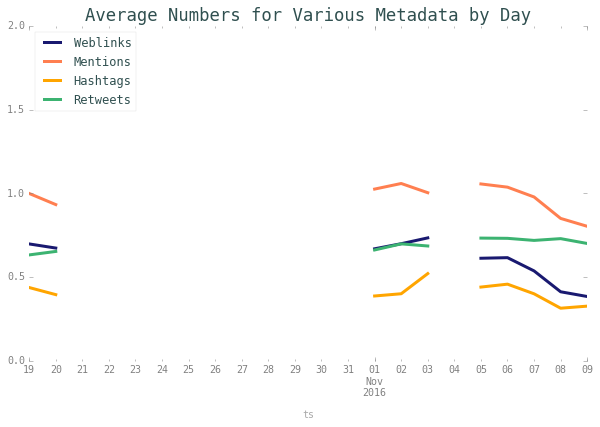

In [37]:
ax = df['n_weblinks'].resample("D").mean().plot(kind='line',label="Weblinks")
df['n_mentions'].resample("D").mean().plot(kind='line',label="Mentions",ax=ax)
df['n_hashtags'].resample("D").mean().plot(kind='line',ax=ax,label="Hashtags")
df['RT'].resample("D").mean().plot(kind='line',ax=ax,label="Retweets")
plt.ylim(0,2)
plt.legend(loc='upper left')
plt.title("Average Numbers for Various Metadata by Day")
plt.show()

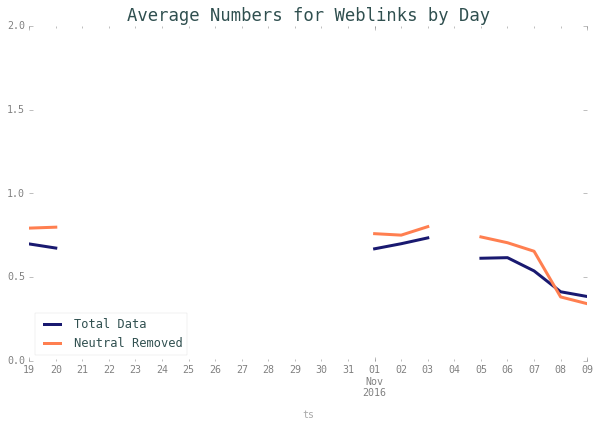

In [38]:
ax = df['n_weblinks'].resample("D").mean().plot(kind='line',label="Total Data")
T['n_weblinks'].resample("D").mean().plot(kind='line',label="Neutral Removed")
plt.ylim(0,2)
plt.legend(loc='lower left')
plt.title("Average Numbers for Weblinks by Day")
plt.show()

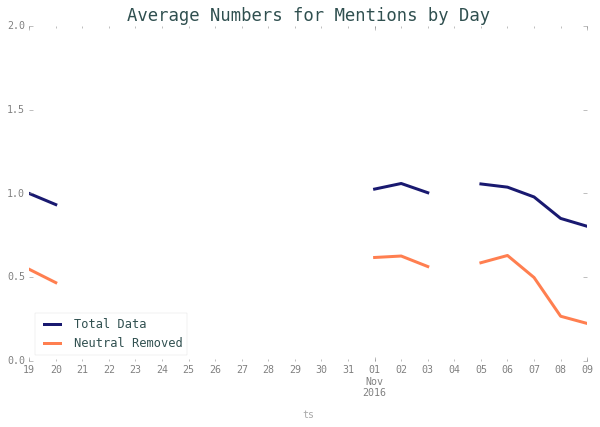

In [40]:
ax = df['n_mentions'].resample("D").mean().plot(kind='line',label="Total Data")
T['n_mentions'].resample("D").mean().plot(kind='line',label="Neutral Removed")
plt.ylim(0,2)
plt.legend(loc='lower left')
plt.title("Average Numbers for Mentions by Day")
plt.show()

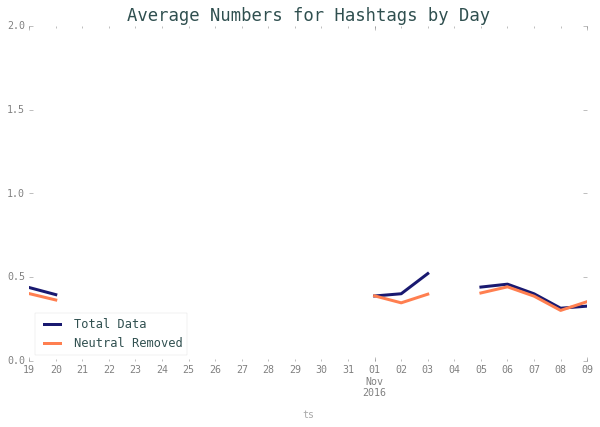

In [41]:
ax = df['n_hashtags'].resample("D").mean().plot(kind='line',label="Total Data")
T['n_hashtags'].resample("D").mean().plot(kind='line',label="Neutral Removed")
plt.ylim(0,2)
plt.legend(loc='lower left')
plt.title("Average Numbers for Hashtags by Day")
plt.show()

In [ ]:
# df['outcome']["2016-11-01":].resample("5Min").mean().interpolate(method='spline',order=5).plot(kind='line',linewidth=2,figsize=(10,6))
# plt.ylim(-.25,.25)